In [2]:
pip install seaborn

     |████████████████████████████████| 285 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import os
os.getcwd()
#os.chdir(r'C:\Users\mgs2374\Desktop')


df = pd.read_csv(f'{os.getcwd()}/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [13]:
generation = df['Generation'].nlargest(1).values
print(f'Generation {generation}')

Generation [6]


In [14]:
index = df.index
number_of_rows = len(index)
print(f'Total pokemons: {number_of_rows}')

Total pokemons: 800


# Types

In [15]:
types = set(df['Type 1'])
print(f'Types: {types} - Total: {len(types)}')

Types: {'Psychic', 'Fire', 'Fairy', 'Flying', 'Normal', 'Poison', 'Fighting', 'Ghost', 'Dark', 'Steel', 'Grass', 'Dragon', 'Ice', 'Rock', 'Ground', 'Water', 'Electric', 'Bug'} - Total: 18


In [16]:
def get_types_on_dataframe(dataframe, type):  
  query = '`Type 1` == "{0}" or `Type 2` == "{1}"'.format(type, type)
  return dataframe.query(query)

In [17]:
def get_dict_types_by_dataframe(dataframe):  
  return {
    "Electric": len(get_types_on_dataframe(dataframe, "Electric")),
    "Dragon": len(get_types_on_dataframe(dataframe, "Dragon")),
    "Poison": len(get_types_on_dataframe(dataframe, "Poison")),
    "Fairy": len(get_types_on_dataframe(dataframe, "Fairy")),
    "Steel": len(get_types_on_dataframe(dataframe, "Steel")),
    "Dark": len(get_types_on_dataframe(dataframe, "Dark")),
    "Bug": len(get_types_on_dataframe(dataframe, "Bug")),
    "Fire": len(get_types_on_dataframe(dataframe, "Fire")),
    "Normal": len(get_types_on_dataframe(dataframe, "Normal")),
    "Ground": len(get_types_on_dataframe(dataframe, "Rock")),
    "Rock": len(get_types_on_dataframe(dataframe, "Rock")),
    "Grass": len(get_types_on_dataframe(dataframe, "Grass")),
    "Psychic": len(get_types_on_dataframe(dataframe, "Psychic")),
    "Water": len(get_types_on_dataframe(dataframe, "Water")),
    "Fighting": len(get_types_on_dataframe(dataframe, "Fighting")),
    "Ghost": len(get_types_on_dataframe(dataframe, "Ghost")),
    "Flying": len(get_types_on_dataframe(dataframe, "Flying")),
    "Ice": len(get_types_on_dataframe(dataframe, "Ice"))
  }

In [18]:
def get_dataframe_with_colors(dataframe):  
  se = pd.Series(['#F7D02C', '#6F35FC', '#A33EA1', '#D685AD', '#B7B7CE', '#705746', '#A6B91A', '#EE8130', '#A8A77A', '#E2BF65', '#B6A136', '#7AC74C', '#F95587', '#6390F0', '#C22E28', '#735797', '#A98FF3', '#96D9D6'])
  dataframe['Colors'] = se.values
  return dataframe.sort_values(by=['Total'], ascending=False)

In [19]:
def get_dataframe_type_total(dataframe):  
  df_types = pd.DataFrame(get_dict_types_by_dataframe(dataframe).items())
  df_types.columns = ['Type', 'Total']
  df_types = get_dataframe_with_colors(df_types)
  return df_types

In [20]:
df_types = get_dataframe_type_total(df)
df_types.head()

,Type,Total,Colors
13,Water,126,#6390F0
8,Normal,102,#A8A77A
16,Flying,101,#A98FF3
11,Grass,95,#7AC74C
12,Psychic,90,#F95587


Text(0.0, 1.0, 'Total de Pokemons by Type')

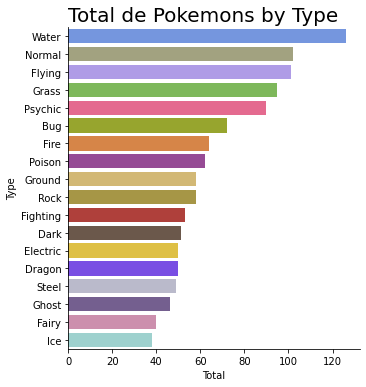

In [21]:
g = sns.catplot(
    x='Total',
    y='Type',
    data=df_types,
    kind='bar',
    palette=sns.color_palette(df_types['Colors'])
)

plt.title(f"Total de Pokemons by Type", loc='left', fontsize=20, fontweight=0, color='Black')

In [45]:
def total_pokemon_by_type_by_generation(generation, x, y):
  df_generation = df.loc[df['Generation'] == generation]
  df_types_generation = get_dataframe_type_total(df_generation)

  g = sns.catplot(
    x='Total',
    y='Type',
    data=df_types_generation,
    ax=ax[x][y],
    kind='bar',
    palette=sns.color_palette(df_types_generation['Colors'])
  )

  plt.title(f"Total Pokémon by type and generation {generation}", loc='left', fontsize=20, fontweight=0, color='Black')

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/categorical.py:3772: UserWarning: catpl

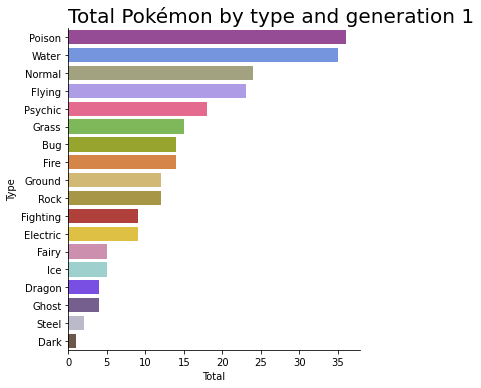

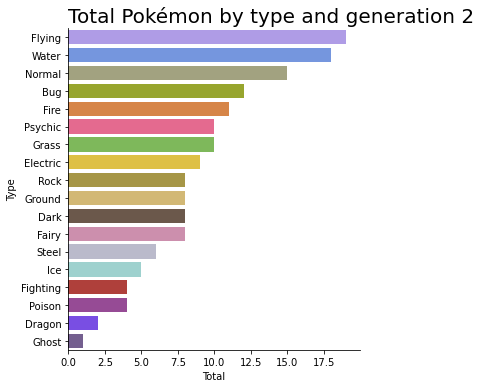

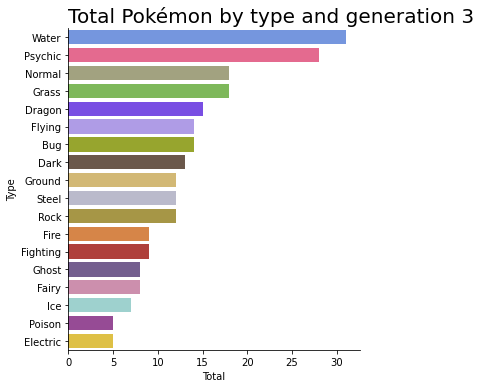

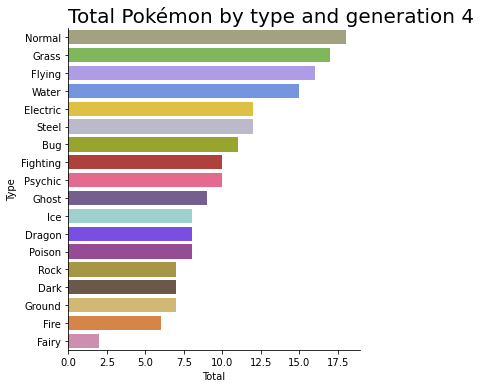

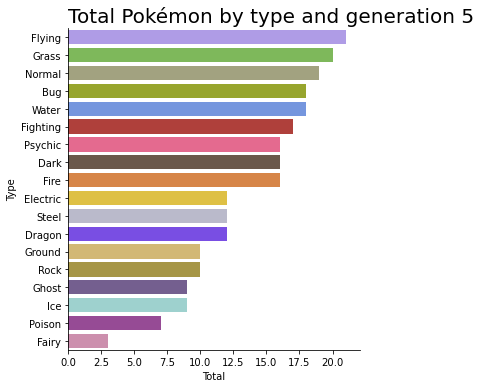

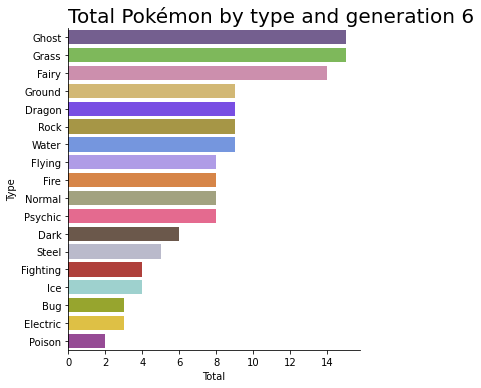

In [51]:
ax[0][0].set_title("Geração 1")
total_pokemon_by_type_by_generation(1, 0, 0)

ax[0][1].set_title("Geração 2")
total_pokemon_by_type_by_generation(2, 0, 1)

ax[1][0].set_title("Geração 3")
total_pokemon_by_type_by_generation(3, 1, 0)

ax[1][1].set_title("Geração 4")
total_pokemon_by_type_by_generation(4, 1, 1)

ax[2][0].set_title("Geração 5")
total_pokemon_by_type_by_generation(5, 2, 0)

ax[2][1].set_title("Geração 6")
total_pokemon_by_type_by_generation(6, 2, 1)

plt.subplots_adjust(hspace=.7)

# Status


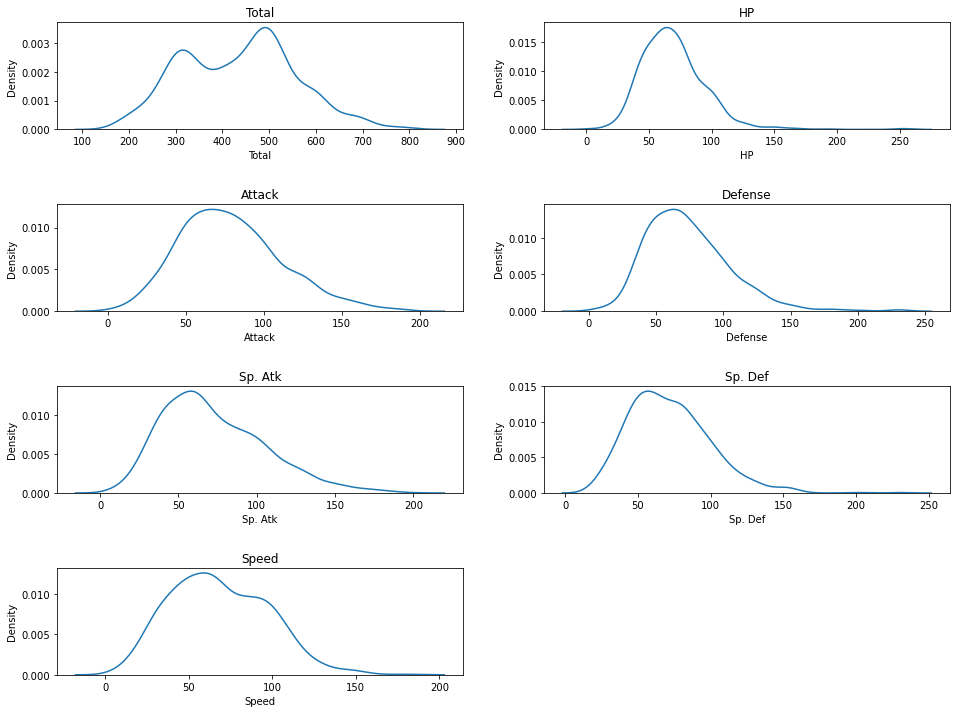

In [24]:
fig, axarr = plt.subplots(4, 2, figsize=(16, 12))

axarr[0][0].set_title("Total")
sns.kdeplot(data=df, x="Total", ax=axarr[0][0])

axarr[0][1].set_title("HP")
sns.kdeplot(data=df, x="HP", ax=axarr[0][1])

axarr[1][0].set_title("Attack")
sns.kdeplot(data=df, x="Attack", ax=axarr[1][0])

axarr[1][1].set_title("Defense")
sns.kdeplot(data=df, x="Defense", ax=axarr[1][1])

axarr[2][0].set_title("Sp. Atk")
sns.kdeplot(data=df, x="Sp. Atk", ax=axarr[2][0])

axarr[2][1].set_title("Sp. Def")
sns.kdeplot(data=df, x="Sp. Def", ax=axarr[2][1])

axarr[3][0].set_title("Speed")
sns.kdeplot(data=df, x="Speed", ax=axarr[3][0])

axarr[3][1].set_visible(False)

plt.subplots_adjust(hspace=.7)

## Status Total

### TOP 100

In [25]:
df_order_by_total = df.sort_values('Total',ascending=False)
df_order_by_total.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [26]:
top_hundred_total = df_order_by_total[:100]
top_hundred_total

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
713,647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5,False
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
714,647,KeldeoResolute Forme,Water,Fighting,580,91,72,90,129,90,108,5,False


In [27]:
legendary = top_hundred_total.loc[top_hundred_total['Legendary'] == True]
normal = top_hundred_total.loc[top_hundred_total['Legendary'] == False]

legendary_size = len(legendary)
normal_size = len(normal)

df_legendary_normal = pd.DataFrame(
  {
    "Normal": normal_size,
    "Legendary": legendary_size
  }.items()
)

df_legendary_normal.head()

,0,1
0,Normal,47
1,Legendary,53


Text(0.0, 1.0, 'Top 100 best Pokemons by Status')

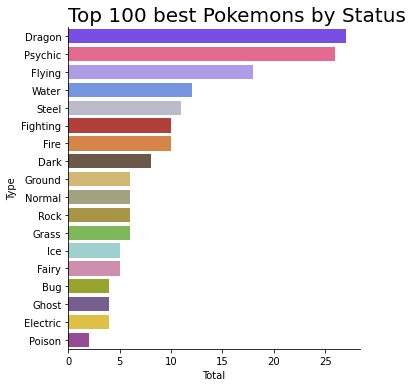

In [28]:
df_types_top_hundred = get_dataframe_type_total(top_hundred_total)
g = sns.catplot(
    x='Total',
    y='Type',
    data=df_types_top_hundred,
    kind='bar',
    palette=sns.color_palette(df_types_top_hundred['Colors'])
)
plt.title(f"Top 100 best Pokemons by Status", loc='left', fontsize=20, fontweight=0, color='Black')

### Top 100 - Without Mega

Text(0.0, 1.0, 'Top 100 best Pokemons by Status - Without mega')

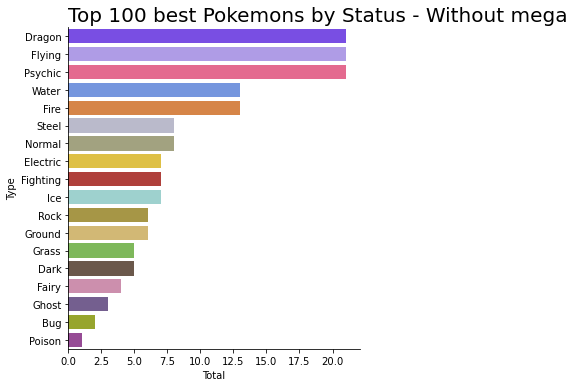

In [29]:
df_order_with_out_megas = df_order_by_total.query('~Name.str.contains("Mega")', engine='python')
df_order_with_out_megas = df_order_with_out_megas[:100]

df_types_with_out_megas = get_dataframe_type_total(df_order_with_out_megas)
g = sns.catplot(
    x='Total',
    y='Type',
    data=df_types_with_out_megas,
    kind='bar',
    palette=sns.color_palette(df_types_with_out_megas['Colors'])
)
plt.title(f"Top 100 best Pokemons by Status - Without mega", loc='left', fontsize=20, fontweight=0, color='Black')

### Top 100 - Without Legendaries

In [30]:
df_order_by_total_with_out_legendary = df.query('`Legendary` == False')
df_order_by_total_with_out_legendary = df_order_by_total_with_out_legendary.sort_values('Total',ascending=False)

top_hundred_total_with_out_legendary = df_order_by_total_with_out_legendary[:100]
top_hundred_total_with_out_legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False


Text(0.0, 1.0, 'Top 100 best Pokemons by Status - Without Legendaries')

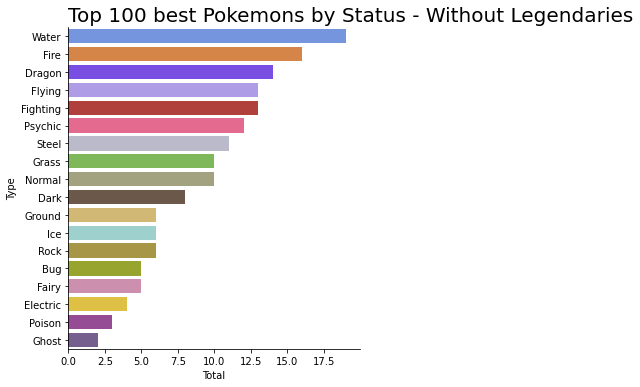

In [31]:
df_types_top_hundred_with_out_legendary = get_dataframe_type_total(top_hundred_total_with_out_legendary)
g = sns.catplot(
    x='Total',
    y='Type',
    data=df_types_top_hundred_with_out_legendary,
    kind='bar',
    palette=sns.color_palette(df_types_top_hundred_with_out_legendary['Colors'])
)
plt.title(f"Top 100 best Pokemons by Status - Without Legendaries", loc='left', fontsize=20, fontweight=0, color='Black')

### Top 100 - Without Legendaries and without megas

Text(0.0, 1.0, 'Top 100 best Pokemons by Status - Without Legendaries and Megas')

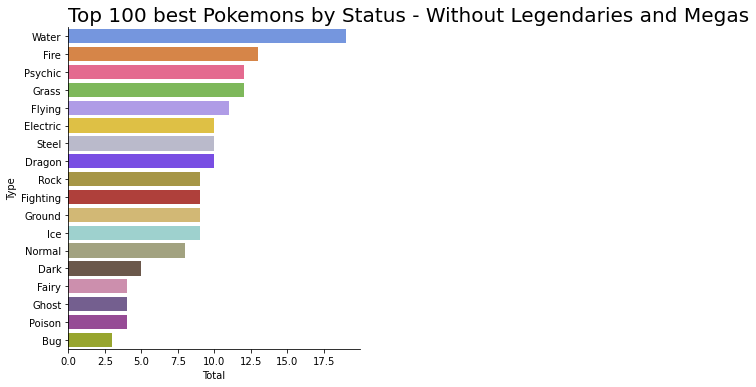

In [32]:
df_order_with_out_legendary_and_megas = df_order_by_total.query('~Name.str.contains("Mega") & `Legendary` == False', engine='python')
df_order_with_out_legendary_and_megas = df_order_with_out_legendary_and_megas[:100]
df_order_with_out_legendary_and_megas.head()

df_types_with_out_legendary_and_megas = get_dataframe_type_total(df_order_with_out_legendary_and_megas)
g = sns.catplot(
    x='Total',
    y='Type',
    data=df_types_with_out_legendary_and_megas,
    kind='bar',
    palette=sns.color_palette(df_types_with_out_legendary_and_megas['Colors'])
)
plt.title(f"Top 100 best Pokemons by Status - Without Legendaries and Megas", loc='left', fontsize=20, fontweight=0, color='Black')

## Status By Generation

In [33]:
def get_boxplot_by_generation(dataframe, status, x, y):
  axarr[x][y].set_title(status, fontsize=24)
  sns.boxplot(x="Generation", y = status, data = df, ax=axarr[x][y])

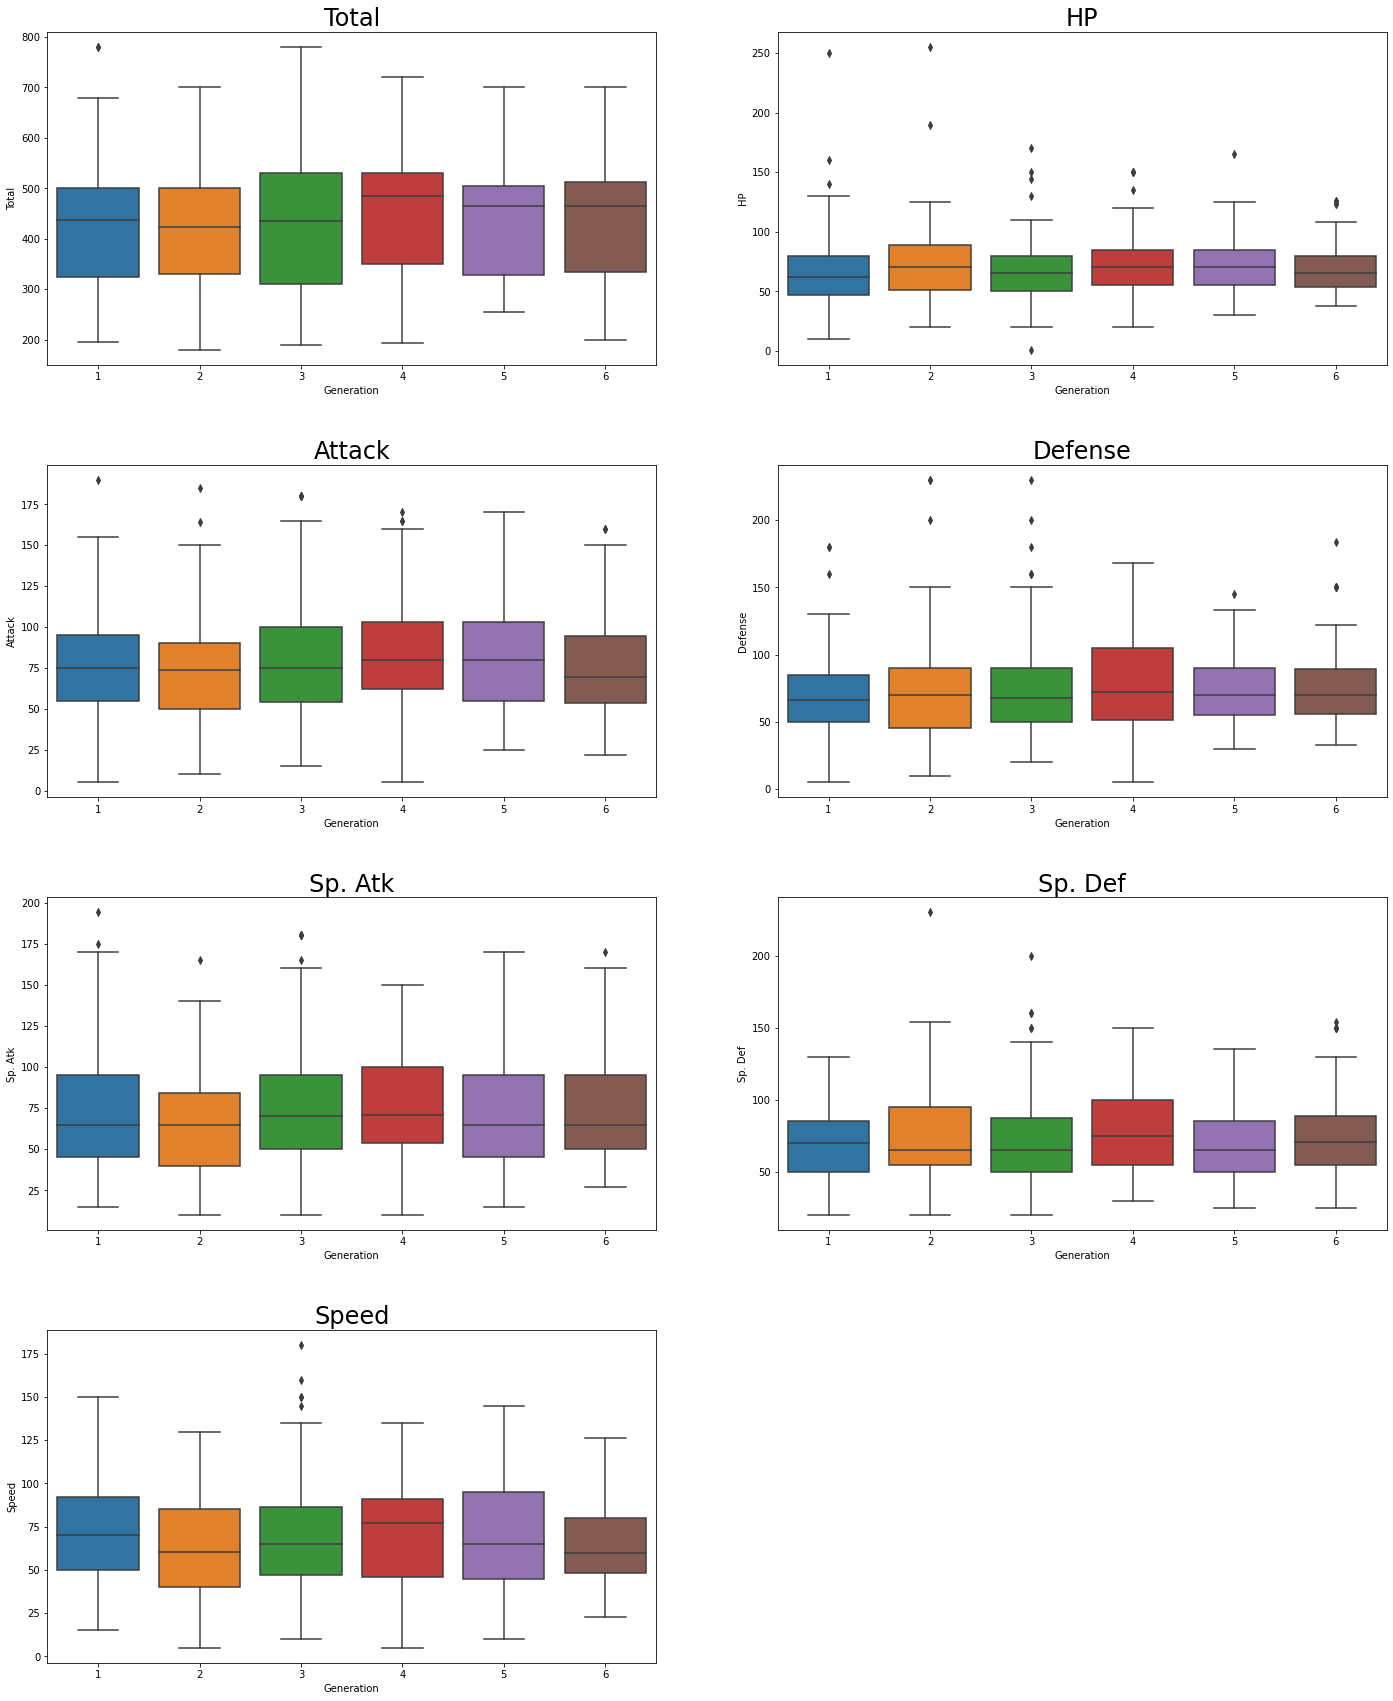

In [34]:
fig, axarr = plt.subplots(4, 2, figsize=(24, 30))

get_boxplot_by_generation(df, 'Total', 0, 0)
get_boxplot_by_generation(df, 'HP', 0, 1)
get_boxplot_by_generation(df, 'Attack', 1, 0)
get_boxplot_by_generation(df, 'Defense', 1, 1)
get_boxplot_by_generation(df, 'Sp. Atk', 2, 0)
get_boxplot_by_generation(df, 'Sp. Def', 2, 1)
get_boxplot_by_generation(df, 'Speed', 3, 0)
axarr[3][1].set_visible(False)

plt.subplots_adjust(hspace=.3)

# Legendary

In [35]:
def get_mean_status_by_legendary(status):
  df_order_by_total_just_legendary = df.query('`Legendary` == True')
  return df_order_by_total_just_legendary[status].mean()

In [36]:
def get_mean_status_by_no_legendary(status):
  df_order_by_total_with_out_legendary = df.query('`Legendary` == False')
  return df_order_by_total_with_out_legendary[status].mean()

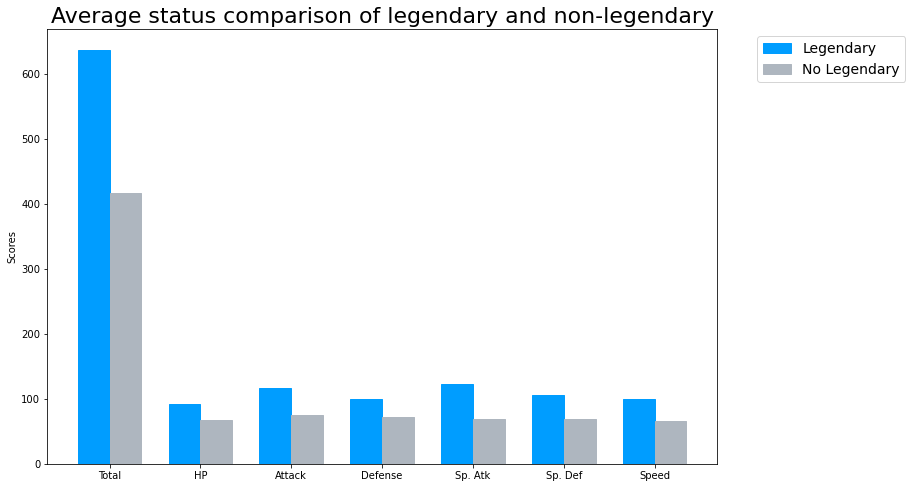

In [37]:
labels = ['Total', "HP",	"Attack",	"Defense",	"Sp. Atk",	"Sp. Def",	"Speed"]
legendary = [get_mean_status_by_legendary('Total'),
                get_mean_status_by_legendary('HP'),
                get_mean_status_by_legendary('Attack'),
                get_mean_status_by_legendary('Defense'),
                get_mean_status_by_legendary('Sp. Atk'),
                get_mean_status_by_legendary('Sp. Def'),
                get_mean_status_by_legendary('Speed')]

no_legendary = [get_mean_status_by_no_legendary('Total'),
                get_mean_status_by_no_legendary('HP'),
                get_mean_status_by_no_legendary('Attack'),
                get_mean_status_by_no_legendary('Defense'),
                get_mean_status_by_no_legendary('Sp. Atk'),
                get_mean_status_by_no_legendary('Sp. Def'),
                get_mean_status_by_no_legendary('Speed')]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 8))
axis_one = ax.bar(x - width/2, legendary, width, label='Legendary')
axis_two = ax.bar(x + width/2, no_legendary, width, label='No Legendary')


for i in range(len(labels)):
  axis_one[i].set_color('#009DFF')
  axis_two[i].set_color('#AEB6BF')


ax.set_title('Average status comparison of legendary and non-legendary', fontsize=22)
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14})

plt.show()